In [1]:
%matplotlib inline

### Percent of COVID-19 tests positive by date,
### from Ohio CDC data.  (outliers and null rejected)

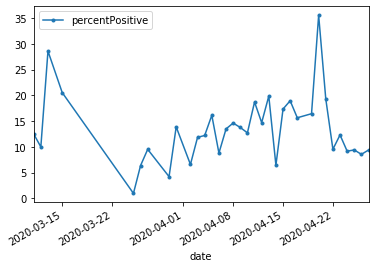

In [2]:
import requests,json
import pandas as pd

result = requests.get("https://covidtracking.com/api/states/daily")
data = json.loads(result.content)
df = pd.DataFrame([ d for d in data if d['state']=='OH'])

df['percentPositive'] =  df.positiveIncrease / df.totalTestResultsIncrease

notNullorOneorZero =  ~df['percentPositive'].isnull() & (df['percentPositive']!=1) & (df['percentPositive']!=0)
notTooBig = ~(df['percentPositive'] > .5)

df_percent = df[['date','percentPositive']][ notNullorOneorZero & notTooBig ] 

df_percent['date'] = pd.to_datetime(df_percent['date'],format='%Y%m%d')
df_percent['percentPositive'] = df_percent['percentPositive']*100

a1 = df_percent.set_index('date').plot(marker='.')
a1.figure.savefig('percent',dpi=100)